In [1]:
import pandas as pd

#### 종이책

In [2]:
pb = pd.read_excel('./data/종이책_독서율__학생__20220721104643.xlsx')

In [3]:
pb = pb.drop([pb.columns[0]], axis=1)
pb = pb.rename(columns={'Unnamed: 3':'2015.1'})

In [4]:
pb = pb.iloc[:2]
pb = pb.drop(pb.columns[[2,4,6,8]], axis=1)
pb = pb.drop([0])
pb = pb.reset_index(drop=True)

In [5]:
pb.loc[0, '통계분류(2)'] = '종이'
pb

,통계분류(2),2015,2017,2019,2021
0,종이,94.9,91.7,90.7,87.4


#### 전자책

In [6]:
eb = pd.read_excel('./data/전자책_독서율__학생__20220721104715.xlsx')

In [7]:
eb = eb.drop([eb.columns[0]], axis=1)
eb = eb.iloc[:2]
eb = eb.drop(eb.columns[[2,4,6,8]], axis=1)
eb = eb.drop([0])
eb = eb.reset_index(drop=True)

In [8]:
eb.loc[0, '통계분류(2)'] = '전자'
eb

,통계분류(2),2015,2017,2019,2021
0,전자,27.1,29.8,37.2,49.1


#### 오디오책

In [9]:
ab = pd.read_excel('./data/오디오북_독서율__학생__20220721104901.xlsx')

In [10]:
ab = ab.drop([ab.columns[0]], axis=1)
ab = ab.iloc[:2]
ab = ab.drop(ab.columns[[2,4]], axis=1)
ab = ab.drop([0])
ab = ab.reset_index(drop=True)

In [11]:
ab.loc[0, '통계분류(2)'] = '오디오책'
ab

,통계분류(2),2019,2021
0,오디오책,18.7,14.3


In [12]:
print(pb)
print()
print(eb)
print()
print(ab)

  통계분류(2)  2015  2017  2019  2021
0      종이  94.9  91.7  90.7  87.4

  통계분류(2)  2015  2017  2019  2021
0      전자  27.1  29.8  37.2  49.1

  통계분류(2)  2019  2021
0    오디오책  18.7  14.3


In [13]:
m3 = pd.merge(pb, eb, how='outer')
m3 = pd.merge(m3, ab, how='outer')

c:\DEV\Langs\Python\Python39\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)
c:\DEV\Langs\Python\Python39\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


In [14]:
m3 = m3.fillna(0)
m3

,통계분류(2),2015,2017,2019,2021
0,종이,94.9,91.7,90.7,87.4
1,전자,27.1,29.8,37.2,49.1
2,오디오책,0.0,0.0,18.7,14.3


In [15]:
m3['사례'] = [1117, 1095, 1108]

In [16]:
m3

,통계분류(2),2015,2017,2019,2021,사례
0,종이,94.9,91.7,90.7,87.4,1117
1,전자,27.1,29.8,37.2,49.1,1095
2,오디오책,0.0,0.0,18.7,14.3,1108


In [17]:
m3['2015_1'] = (m3['사례'] * m3[2015]) * 0.01
m3['2017_1'] = (m3['사례'] * m3['2017']) * 0.01
m3['2019_1'] = (m3['사례'] * m3['2019']) * 0.01
m3['2021_1'] = (m3['사례'] * m3['2021']) * 0.01

m3 = m3.drop(m3.columns[[1,2,3,4,5]], axis=1)

In [18]:
m3

,통계분류(2),2015_1,2017_1,2019_1,2021_1
0,종이,1060.033,1024.289,1013.119,976.258
1,전자,296.745,326.310,407.340,537.645
2,오디오책,0.000,0.000,207.196,158.444


In [39]:
m4 = m3.set_index("통계분류(2)")
m4 = m4.transpose()
m4

통계분류(2),종이,전자,오디오책
2015_1,1060.033,296.745,0.000
2017_1,1024.289,326.310,0.000
2019_1,1013.119,407.340,207.196
2021_1,976.258,537.645,158.444


In [40]:
m4['종이']

2015_1    1060.033
2017_1    1024.289
2019_1    1013.119
2021_1     976.258
Name: 종이, dtype: float64

In [19]:
#### 그래프
import matplotlib.pyplot as plt
import numpy as np

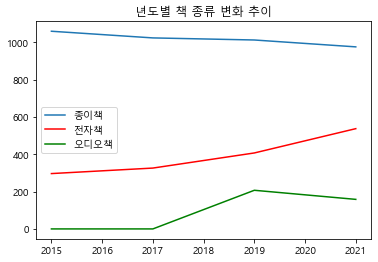

In [69]:
years = [2015, 2017, 2019, 2021]

# 한글 폰트 지정
plt.rc('font', family='Malgun Gothic')

plt.plot(years, m4['종이'], linestyle='solid')
plt.plot(years, m4['전자'], color='red', linestyle='solid')
plt.plot(years, m4['오디오책'], color='green', linestyle='solid')
plt.title('년도별 책 종류 변화 추이')
plt.legend(['종이책', '전자책', '오디오책'], loc=6)
plt.show()